In [1]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from cycler import cycler
from itertools import cycle

fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [2]:
plt.rcParams['image.origin'] = 'lower'

In [3]:
#mom0_17 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw17_12CO/g5a.mom0.smK.tot.12CO.spw17.im', format='casa_image')
#mom0_21 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw21_CH3OH/g5a.mom0.smK.tot.CH3OH.spw21.im', format='casa_image')
#mom0_23 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw23_H2CO/g5a.mom0.smK.tot.H2CO.spw23.im', format='casa_image')
#mom0_25 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw25_H2CO/g5a.mom0.smK.tot.H2CO.spw25.im/', format='casa_image')
#mom0_27 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw27_SiO/g5a.mom0.smK.tot.SiO.spw27.im', format='casa_image')
#mom0_29 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw29_13CO/g5a.mom0.smK.tot.13CO.spw29.im', format='casa_image')
#mom0_31 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw31_C18O/g5a.mom0.smK.tot.C18O.spw31.im', format='casa_image')

'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits'
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits'
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits' 
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits' 
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits'
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits'
'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits'


'/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits'

In [4]:
'''
cube_17 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw17_12CO/g5a.12CO.spw17.im', format='casa_image').to(u.K)
cube_21 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw21_CH3OH/g5a.CH3OH.spw21.im', format='casa_image').to(u.K)
cube_23 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw23_H2CO/g5a.H2CO.spw23.im', format='casa_image').to(u.K)
cube_25 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw25_H2CO/g5a.H2CO.spw25.im/', format='casa_image').to(u.K)
cube_27 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw27_SiO/g5a.SiO.spw27.im', format='casa_image').to(u.K)
cube_29 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw29_13CO/g5a.13CO.spw29.im', format='casa_image').to(u.K)
cube_31 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw31_C18O/g5a.C18O.spw31.im', format='casa_image').to(u.K)
'''
a_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits' 
               ]
a_fixednames =['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits' 
               ]

cube_17 = SpectralCube.read(a_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_21 = SpectralCube.read(a_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_23 = SpectralCube.read(a_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_25 = SpectralCube.read(a_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_27 = SpectralCube.read(a_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_29 = SpectralCube.read(a_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
cube_31 = SpectralCube.read(a_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')#.with_spectral_unit(u.GHz, velocity_convention='radio')
'''

combo_fixednames = [
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',
    'lol',
    #'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.masked.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'
    ]

cube_17 = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_21 = SpectralCube.read(combo_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_23 = SpectralCube.read(combo_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_25 = SpectralCube.read(combo_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_27 = SpectralCube.read(combo_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_29 = SpectralCube.read(combo_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_31 = SpectralCube.read(combo_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
'''

"\n\ncombo_fixednames = [\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',\n    'lol',\n    #'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.masked.spw21.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',\n    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'\n    ]\n\ncube_17 = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')\ncube_21 = SpectralCube.read(combo_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')\ncube_23 

In [5]:
'/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/'

'/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/'

In [6]:
cut_cube_17 = cube_17.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_21 = cube_21.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_23 = cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_25 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_27 = cube_27.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_29 = cube_29.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_31 = cube_31.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)

In [7]:
mom0_17 = cut_cube_17.moment0()
mom0_21 = cut_cube_21.moment0()
mom0_23 = cut_cube_23.moment0()
mom0_25 = cut_cube_25.moment0()
mom0_27 = cut_cube_27.moment0()
mom0_29 = cut_cube_29.moment0()
mom0_31 = cut_cube_31.moment0()

In [8]:
#mom0_17 = cube_17.moment0()

In [9]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).mad_std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def ratio_formal(mom0_numer, mom0_denom, mask_numer):
    ratio = mom0_numer / (mom0_denom).reproject(header=mom0_numer.header)
    ratio = ratio*mask_numer
    # Ratio must be reasonable
    try: 
        ratio[ratio > 5] = np.nan
    except: 
        ratio[ratio > 5*u.K] = np.nan
    ratio.quicklook(use_aplpy=False)
    return ratio

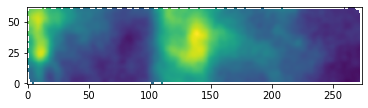

In [10]:
#ax.imshow(mom0_17[0].value)
mom0_17.quicklook(use_aplpy=False)

INFO: Auto-setting vmin to  1.388e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.794e+02 [aplpy.core]


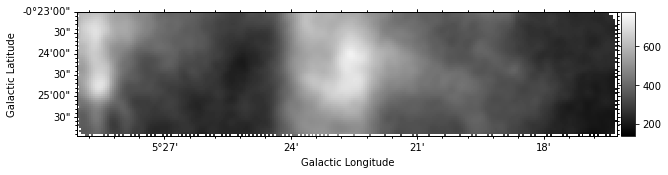

In [11]:
#ax = pl.subplot(111, projection=mom0_17.wcs.celestial)
#ax.imshow(mom0_17[0].value)
mom0_17.quicklook()

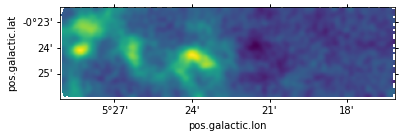

In [12]:
ax = pl.subplot(111, projection=mom0_21.wcs.celestial)
mom0_21.quicklook(use_aplpy=False)

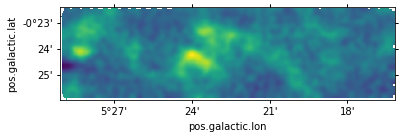

In [13]:
ax = pl.subplot(111, projection=mom0_23.wcs.celestial)
mom0_23.quicklook(use_aplpy=False)

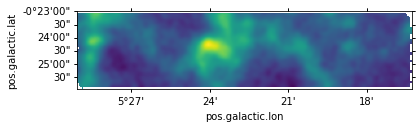

In [14]:
ax = pl.subplot(111, projection=mom0_25.wcs.celestial)
mom0_25.quicklook(use_aplpy=False)

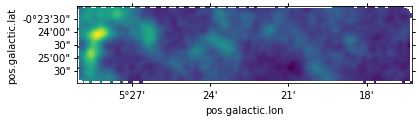

In [15]:
ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
mom0_27.quicklook(use_aplpy=False)

INFO: Auto-setting vmin to -6.385e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.754e+00 [aplpy.core]
INFO: Auto-setting vmin to -7.093e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.802e+00 [aplpy.core]


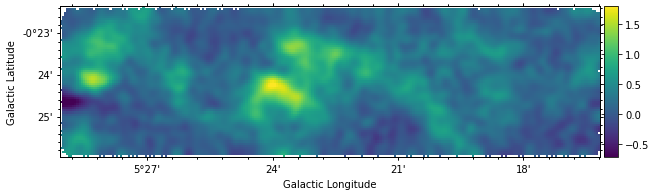

In [16]:
#ax = pl.subplot(111, projection=mom0_23.wcs.celestial)
mom0_alt_23 = cut_cube_23.moment(order=0)
mom0_alt_23.quicklook()#(use_aplpy=False)
mom0_alt_23.FITSFigure.show_colorscale(cmap='viridis')


INFO: Auto-setting vmin to -8.727e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.395e+00 [aplpy.core]
INFO: Auto-setting vmin to -8.585e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.393e+00 [aplpy.core]


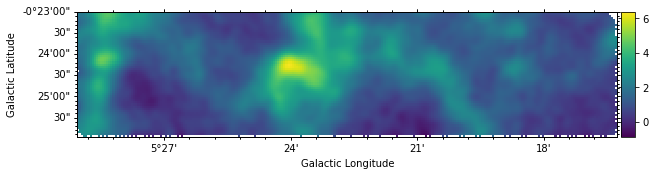

In [17]:
mom0_alt_25 = cut_cube_25.moment(order=0)
#plt.figure(figsize=(12,4))
#ax = pl.subplot(111, projection=mom0_alt_25.wcs.celestial)
mom0_alt_25.quicklook()
mom0_alt_25.FITSFigure.show_colorscale(cmap='viridis')

#plt.colorbar()

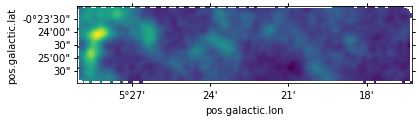

In [18]:
mom0_alt_27 = cut_cube_27.moment(order=0)
ax = pl.subplot(111, projection=mom0_alt_27.wcs.celestial)
mom0_alt_27.quicklook(use_aplpy=False)

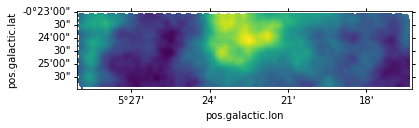

In [19]:
mom0_alt_29 = cut_cube_29.moment(order=0)
ax = pl.subplot(111, projection=mom0_alt_29.wcs.celestial)
mom0_alt_29.quicklook(use_aplpy=False)

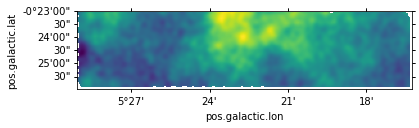

In [20]:
mom0_alt_31 = cut_cube_31.moment(order=0)
ax = pl.subplot(111, projection=mom0_alt_31.wcs.celestial)

mom0_alt_31.quicklook(use_aplpy=False)

In [21]:
#cube_27.reproject(header=cube_25.header).quicklook()

Text(0.5, 1.0, 'SiO/H2CO Ratio')

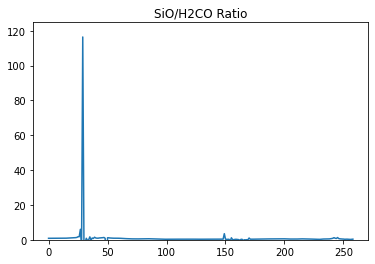

In [22]:
ratio_sio = mom0_alt_27.reproject(header=mom0_alt_25.header) / mom0_alt_25
mean_ratio_sio = np.nanmean(ratio_sio, axis=0)
#ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
plt.plot(mean_ratio_sio)
plt.ylim(bottom=0)
plt.title('SiO/H2CO Ratio')

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'H2CO/H2CO Ratio')

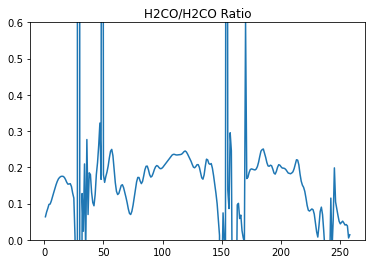

In [23]:
ratio_h2co = mom0_alt_23.reproject(header=mom0_alt_25.header) / mom0_alt_25
mean_ratio_h2co = np.nanmean(ratio_h2co, axis=0)
#ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
plt.plot(mean_ratio_h2co)
plt.ylim(bottom=0,top=0.6)
plt.title('H2CO/H2CO Ratio')

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, '13CO/H2CO Ratio')

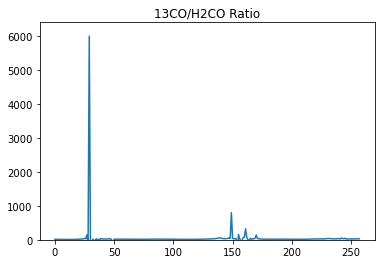

In [24]:
ratio_13co = mom0_alt_29.reproject(header=mom0_alt_25.header) / mom0_alt_25
mean_ratio_13co = np.nanmean(ratio_13co, axis=0)
#ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
plt.plot(mean_ratio_13co)
plt.ylim(bottom=0)
plt.title('13CO/H2CO Ratio')

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'C18O/H2CO Ratio')

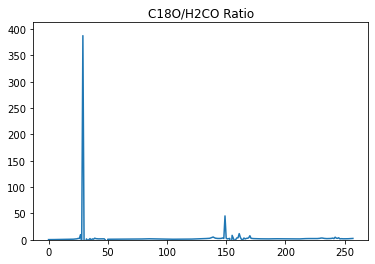

In [25]:
ratio_c18o = mom0_alt_31.reproject(header=mom0_alt_25.header) / mom0_alt_25
mean_ratio_c18o = np.nanmean(ratio_c18o, axis=0)
#ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
plt.plot(mean_ratio_c18o)
plt.ylim(bottom=0)
plt.title("C18O/H2CO Ratio")

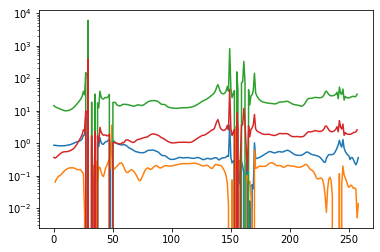

In [26]:
plt.plot(mean_ratio_sio)
plt.plot(mean_ratio_h2co)
plt.plot(mean_ratio_13co)
plt.plot(mean_ratio_c18o)
plt.yscale('log')
#plt.ylim(bottom=0)

In [27]:
cut_cube_23 = cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
cut_cube_25 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
mom0_alt_23 = cut_cube_23.moment(order=0)
mom0_alt_25 = cut_cube_25.moment(order=0)
#mom0_alt_25.quicklook()

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'H2CO/H2CO Ratio')

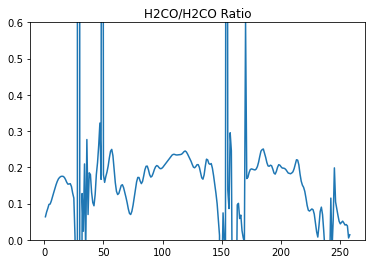

In [28]:
ratio_h2co = mom0_alt_23.reproject(header=mom0_alt_25.header) / mom0_alt_25
mean_ratio_h2co = np.nanmean(ratio_h2co, axis=0)
#ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
plt.plot(mean_ratio_h2co)
plt.ylim(bottom=0,top=0.6)
plt.title('H2CO/H2CO Ratio')

In [29]:
cube_23_a = cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 75*u.km/u.second)
cube_23_b = cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(75*u.km / u.second, 225*u.km/u.second)
mom0_a_23 = cube_23_a.moment(order=0)
mom0_b_23 = cube_23_b.moment(order=0)

cube_25_a = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(0*u.km / u.second, 75*u.km/u.second)
cube_25_b = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(75*u.km / u.second, 225*u.km/u.second)
mom0_a_25 = cube_25_a.moment(order=0)
mom0_b_25 = cube_25_b.moment(order=0)

In [30]:
#noisemap = cube.spectral_slab(362.603*u.GHz, 363.283*u.GHz).std(axis=0)
#spatial_mask = peak_amplitude > 3*noisemap

noisemap23=cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_23a = cube_23_a.max(axis=0)
spatial_mask_23_a = peak_23a > 6.5*noisemap23

noisemap25=cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_25a = cube_25_a.max(axis=0)
spatial_mask_25_a = peak_25a > 6.5*noisemap25


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


In [31]:
spatial_mask_23_a.shape
peak_23a.shape
noisemap23.shape
cube_23_a.shape

(113, 73, 262)

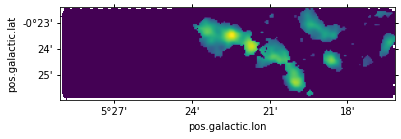

In [32]:
ax = pl.subplot(111, projection=mom0_a_23.wcs.celestial)

(mom0_a_23*spatial_mask_23_a).quicklook(use_aplpy=False)

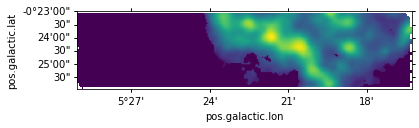

In [33]:
ax = pl.subplot(111, projection=mom0_a_25.wcs.celestial)

(mom0_a_25*spatial_mask_25_a).quicklook(use_aplpy=False)

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


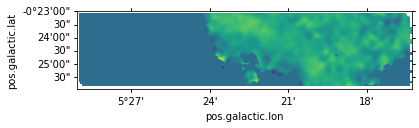

In [34]:
ratio_h2co_a = (mom0_a_23).reproject(header=mom0_a_25.header) / (mom0_a_25)
ax = pl.subplot(111, projection=ratio_h2co_a.wcs.celestial)

ratio_h2co_a = ratio_h2co_a * (spatial_mask_25_a)
ratio_h2co_a.quicklook(use_aplpy=False)
mean_a_h2co = np.nanmean(ratio_h2co_a, axis=0)

In [35]:
noisemap23=cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_23b = cube_23_b.max(axis=0)
spatial_mask_23_b = peak_23b > 6.5*noisemap23

noisemap25=cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_25b = cube_25_b.max(axis=0)
spatial_mask_25_b = peak_25b > 6.5*noisemap25

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


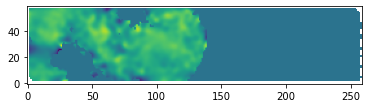

In [36]:
ratio_h2co_b = (mom0_b_23).reproject(header=mom0_b_25.header) / (mom0_b_25)
ratio_h2co_b = ratio_h2co_b * (spatial_mask_25_b)
ratio_h2co_b.quicklook(use_aplpy=False)
mean_b_h2co = np.nanmean(ratio_h2co_b, axis=0)

In [37]:
ww = wcs.WCS(mom0_b_23.header)
pixelarea = ww.proj_plane_pixel_area()#.to(u.sr)
np.sqrt(pixelarea.to(u.rad**2)).to(u.arcsecond)

<Quantity 2.95787731 arcsec>

In [38]:
#spatial_mask_fix_25 = noise_mask(per10_subtracted, 175*u.km / u.second, 225*u.km/u.second, 5.0)
#ratio_sio = ratio_formal(mom0_alt_27, mom0_alt_25, spatial_mask_25)
#mean_ratio_sio = mean_ratio(ratio_sio)
#plt.colorbar()

Text(0.5, 1.0, 'Ratio of H2CO Lines')

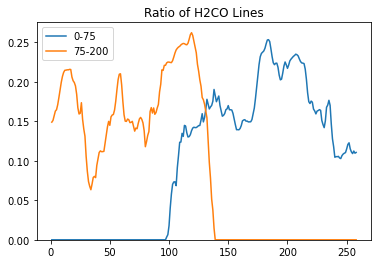

In [39]:
plt.plot(mean_a_h2co, label='0-75')
plt.plot(mean_b_h2co, label='75-200')
plt.ylim(bottom=0)
plt.legend()
plt.title('Ratio of H2CO Lines')

In [40]:
maskaaa = mean_a_h2co > 0.025
maskbbb = mean_b_h2co > 0.025


In [41]:
#TK = 590*ratio + 2.88 * ratio + 23.4
def t_kin(ratio):
    # ratio of spw 23 / spw 25
    return 590*np.power(ratio, 2) + 2.88*ratio + 23.4

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


INFO: Auto-setting vmin to  3.592e-03 [aplpy.core]
INFO: Auto-setting vmax to  9.780e-03 [aplpy.core]


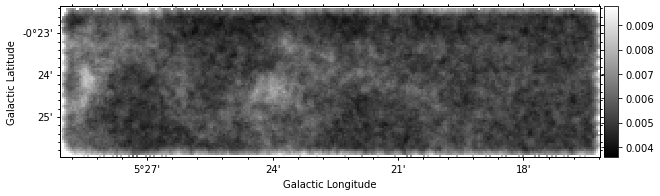

In [42]:
noise = cube_23.mad_std(axis=0)
noise.quicklook()

INFO: Auto-setting vmin to -7.068e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.781e+00 [aplpy.core]


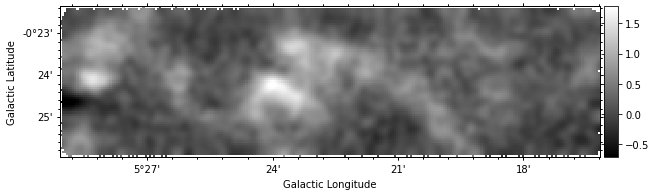

In [43]:
#(mom0_alt_23/mom0_alt_25.reproject(mom0_alt_23.header)).quicklook()
mom0_alt_23.quicklook()

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


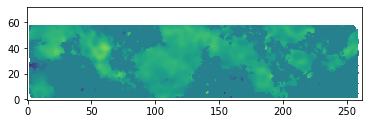

In [44]:
#spatial_mask_25 = noise_mask(cube_25, 0*u.km / u.second, 225*u.km/u.second, 5.0)
spatial_mask_23 = noise_mask(cube_23, 175*u.km / u.second, 225*u.km/u.second, 5.0)

ratio_h2co = ratio_formal(mom0_alt_23, mom0_alt_25, spatial_mask_23)
#mean_ratio_h2co = mean_ratio(ratio_h2co)
#masked_25 = cube_25.with_mask(cube_25>0.015*u.K)
#masked_23 = cube_23.with_mask(cube_23>0.015*u.K)

#masked_25_mom0 = masked_25.moment0()
#masked_23_mom0 = masked_23.moment0()

#ratio_h2co = (mom0_23).reproject(header=mom0_25.header) / (mom0_25)
#ratio_h2co = masked_23_mom0.reproject(header=masked_25_mom0.header) / (masked_25_mom0)

INFO: Auto-setting vmin to  1.157e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.547e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.204e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.495e+02 [aplpy.core]


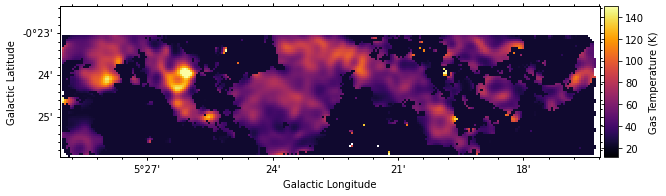

In [45]:
T_all = t_kin(ratio_h2co)
T_all[T_all>200] = np.nan
T_all.quicklook()
T_all.FITSFigure.show_colorscale(cmap='inferno')
T_all.FITSFigure.colorbar.set_axis_label_text('Gas Temperature (K)')

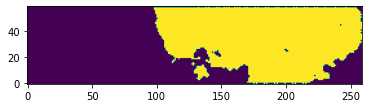

In [46]:
plt.imshow(spatial_mask_25_a)

INFO: Auto-setting vmin to  1.556e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.105e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.561e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.100e+02 [aplpy.core]


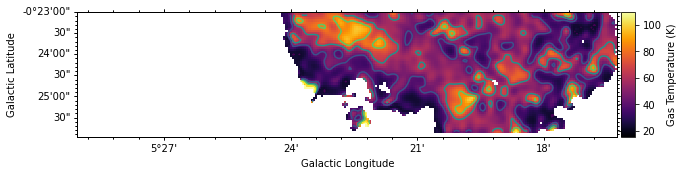

In [47]:
T_a = t_kin(ratio_h2co_a)
T_a[T_a>175] = np.nan
T_a[np.logical_not(spatial_mask_25_a)] = np.nan
T_a.quicklook()
T_a.FITSFigure.show_colorscale(cmap='inferno')
T_a.FITSFigure.colorbar.set_axis_label_text('Gas Temperature (K)')
T_a.FITSFigure.show_contour(T_a.hdu)
#T_a.FITSFigure.savefig('plots/temperature_b.pdf')

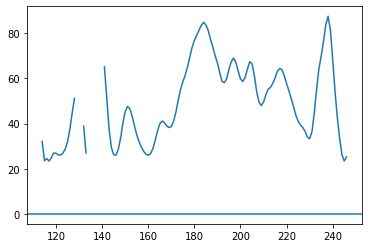

In [48]:
plt.plot(T_a[20])
plt.axhline(0)

INFO: Auto-setting vmin to  1.241e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.454e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.210e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.489e+02 [aplpy.core]


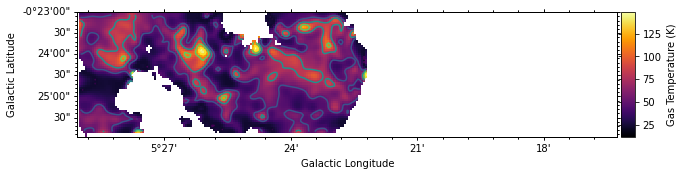

In [49]:
T_b = t_kin(ratio_h2co_b)
T_b[T_b>175] = np.nan
T_b[np.logical_not(spatial_mask_25_b)] = np.nan
T_b.quicklook()
T_b.FITSFigure.show_colorscale(cmap='inferno')
T_b.FITSFigure.colorbar.set_axis_label_text('Gas Temperature (K)')
T_b.FITSFigure.show_contour(T_b.hdu)
#T_b.FITSFigure.savefig('plots/temperature_a.pdf')

In [50]:
np.isfinite(T_b).sum()

6532

In [51]:
np.isfinite(T_a).sum()

7367

In [52]:
from scipy.stats import ks_2samp
ks_2samp(T_a.ravel(), T_b.ravel())


KstestResult(statistic=0.08397683397683398, pvalue=4.063762537115018e-48)

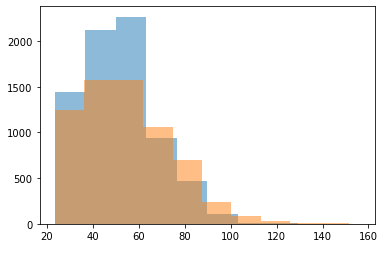

In [53]:
with quantity_support():
    plt.hist(T_a[np.isfinite(T_a)], alpha=0.5)
    plt.hist(T_b[np.isfinite(T_b)], alpha=0.5)
    #plt.yscale('log')

In [54]:
np.nanmean(T_a[np.isfinite(T_a)])

<Quantity 51.35493748>

In [55]:
np.median(T_a[np.isfinite(T_a)])

<Quantity 50.49131086>

In [56]:
mean_tema_h2co = np.nanmean(T_a, axis=0)
mean_temb_h2co = np.nanmean(T_b, axis=0)
base = np.zeros(len(mean_tema_h2co))

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


In [57]:
T_a

<Projection [[nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             ...,
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan]]>

In [58]:
from astropy.stats import mad_std
std_tempa_h2co = np.nanstd(T_a, axis=0)#(T_a, axis=0, ignore_nan=True, func=np.ma.median)
std_tempb_h2co = np.nanstd(T_b, axis=0)

#std_tempa_h2co = std_tempa_h2co*maskaaa
#std_tempb_h2co = std_tempb_h2co*maskbbb

#std_tempa_h2co[mean_tempa_h2co_masked==np.nan] = np.nan
#std_tempb_h2co[std_tempb_h2co==0] = np.nan

<__array_function__ internals>:180: RuntimeWarning: Degrees of freedom <= 0 for slice.


In [59]:
mean_tempa_h2co_masked = mean_tema_h2co*maskaaa
mean_tempb_h2co_masked = mean_temb_h2co*maskbbb

std_tempa_h2co[mean_tempa_h2co_masked==0] = np.nan
std_tempb_h2co[mean_tempb_h2co_masked==0] = np.nan

mean_tempa_h2co_masked[mean_tempa_h2co_masked==0] = np.nan
mean_tempb_h2co_masked[mean_tempb_h2co_masked==0] = np.nan


In [60]:
x = np.arange(len(mean_tempa_h2co_masked)) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)

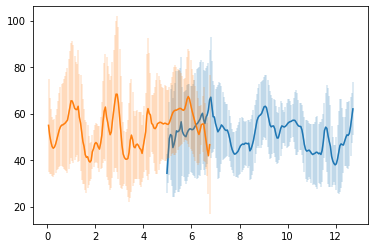

In [61]:
plt.errorbar(x=x,y=mean_tempa_h2co_masked,yerr=std_tempa_h2co, alpha=0.2, color='tab:blue')
plt.plot(x, mean_tempa_h2co_masked, color='tab:blue')
plt.errorbar(x=x,y=mean_tempb_h2co_masked,yerr=std_tempb_h2co, alpha=0.2, color='tab:orange')
plt.plot(x, mean_tempb_h2co_masked, color='tab:orange')

#plt.plot(x,mean_tempa_h2co_masked)

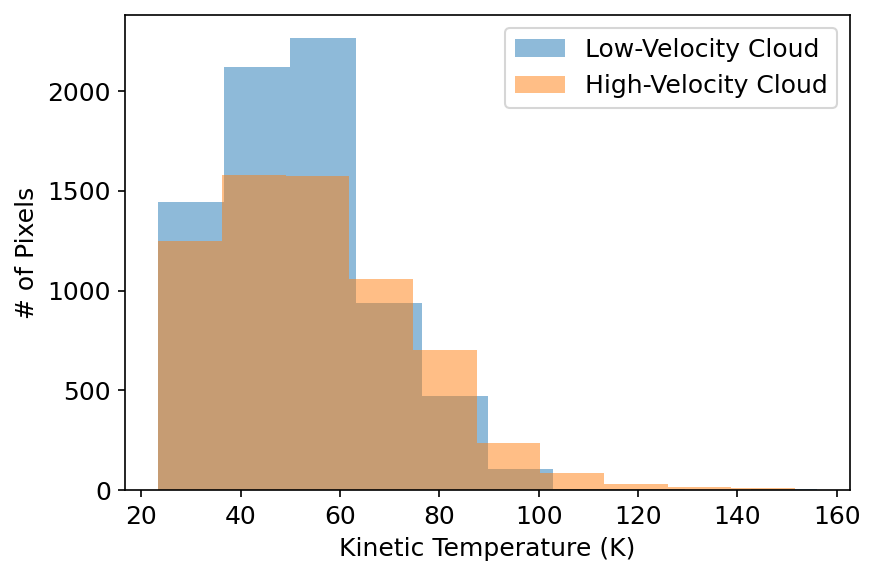

In [62]:
with quantity_support():
    #np.isfinite(mass_map)
    plt.figure(figsize=(6,4),dpi=150)
    plt.rcParams.update({'font.size': 12})

    plt.hist(T_a[np.isfinite(T_a)], alpha=0.5, label='Low-Velocity Cloud')
    plt.hist(T_b[np.isfinite(T_b)], alpha=0.5, label='High-Velocity Cloud')
    #maskedb = mean_tempb_h2co_masked[np.isfinite(mean_tempb_h2co_masked)]
    #maskeda = mean_tempa_h2co_masked[np.isfinite(mean_tempa_h2co_masked)]
    #abin = plt.hist(maskeda, alpha=0.5, label='Low-Velocity Cloud')
    #bbin = plt.hist(maskedb, alpha=0.5, label='High-Velocity Cloud')
    plt.legend()
    plt.xlabel('Kinetic Temperature (K)')
    plt.ylabel('# of Pixels')
    plt.tight_layout()
    #plt.yscale('log')

    plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/temphist.pdf')

In [63]:
maskeda.size

NameError: name 'maskeda' is not defined

In [64]:
from scipy.stats import ks_2samp

In [65]:
ks_2samp(maskeda, maskedb)

NameError: name 'maskeda' is not defined

In [66]:
bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

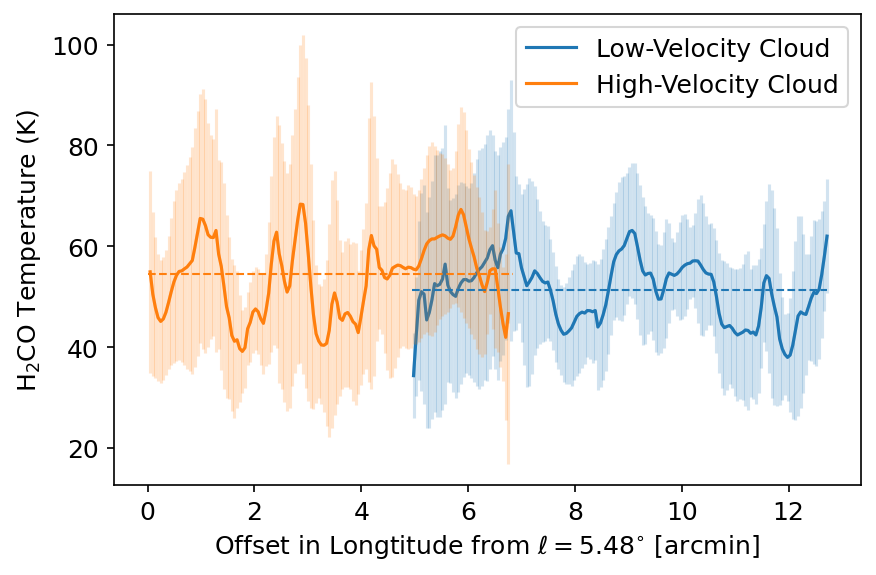

In [67]:
plt.figure(figsize=(6,4),dpi=150)
plt.rcParams.update({'font.size': 12})

plt.errorbar(x=x,y=mean_tempa_h2co_masked,yerr=std_tempa_h2co, alpha=0.2, color='tab:blue')
plt.plot(x, mean_tempa_h2co_masked, color='tab:blue', label='Low-Velocity Cloud')
plt.errorbar(x=x,y=mean_tempb_h2co_masked,yerr=std_tempb_h2co, alpha=0.2, color='tab:orange')
plt.plot(x, mean_tempb_h2co_masked, color='tab:orange', label='High-Velocity Cloud')

plt.hlines(y=np.nanmean(T_a[np.isfinite(T_a)]), xmin=4.95, xmax=12.718872, linewidth=1, linestyle='dashed', color='tab:blue') # Low velocity
plt.hlines(y=np.nanmean(T_b[np.isfinite(T_b)]), xmin=0, xmax=6.85, linewidth=1, linestyle='dashed', color='tab:orange') # High velocity

plt.ylabel('H$_2$CO Temperature (K)')
plt.xlabel("Offset in Longtitude from $\ell=5.48^{\circ}$ [arcmin]")
plt.legend()
plt.tight_layout()

plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/temperature.pdf')

In [68]:
np.nanmean(T_a[np.isfinite(T_a)])

<Quantity 51.35493748>

In [69]:
np.nanmean(mean_tempa_h2co_masked) # Low Velocity Cloud

<Projection 51.28281848>

In [70]:
np.nanmean(T_b[np.isfinite(T_b)])

<Quantity 54.43276845>

In [71]:
np.nanmean(mean_tempb_h2co_masked) # High Velocity Cloud

<Projection 53.73627098>

In [72]:
plt.rcParams.update({'font.size': 12})


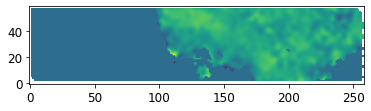

In [73]:
ratio_h2co_a.quicklook(use_aplpy=False)

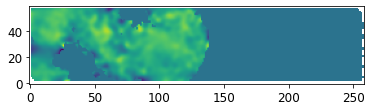

In [74]:
ratio_h2co_b.quicklook(use_aplpy=False)

In [75]:
noisemap23 = cube_23.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_23 = cube_23.max(axis=0)
spatial_mask_23 = peak_23 > 5.*noisemap23

noisemap25 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(175*u.km / u.second, 225*u.km/u.second).std(axis=0)
peak_25 = cube_25.max(axis=0)
spatial_mask_25 = peak_25 > 5.*noisemap25

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


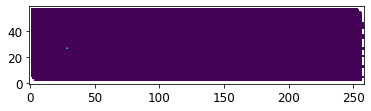

In [76]:
ratio_h2co = (mom0_alt_23).reproject(header=mom0_alt_25.header) / (mom0_alt_25)
ratio_h2co = ratio_h2co * (spatial_mask_25)
ratio_h2co.quicklook(use_aplpy=False)
mean_h2co = np.nanmean(ratio_h2co, axis=0)
mean_h2co[257] = np.nan

Text(0.5, 1.0, 'Ratio of H2CO Lines')

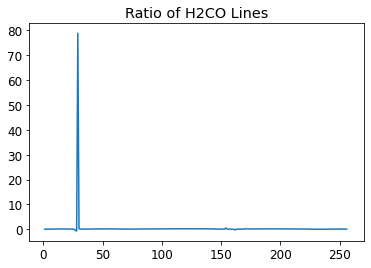

In [77]:
plt.plot(mean_h2co[:])
plt.title('Ratio of H2CO Lines')

In [78]:
T_tot = t_kin(ratio_h2co)
mean_temp_h2co = np.nanmean(T_tot, axis=0)
mean_temp_h2co[257] = np.nan

(259,)

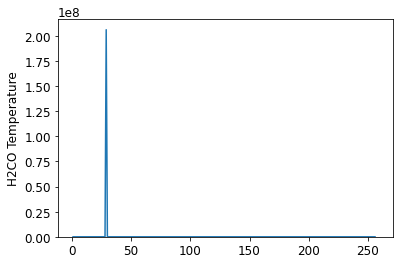

In [79]:
plt.plot(mean_temp_h2co[:])
plt.ylim(bottom=0)
plt.ylabel('H2CO Temperature')
mean_temp_h2co.shape

In [80]:


def mean_ratio(ratio):
    return np.nanmean(ratio, axis=0)
    #return np.nanmedian(ratio, axis=0)
    
def median_ratio(ratio):
    return np.nanmedian(ratio, axis=0)
    #return np.nanmedian(ratio, axis=0)

'''ratio_h2co = (mom0_alt_23).reproject(header=mom0_alt_25.header) / (mom0_alt_25)
ratio_h2co = ratio_h2co * (spatial_mask_25)
ratio_h2co.quicklook()
mean_h2co = np.nanmean(ratio_h2co, axis=0)'''

'ratio_h2co = (mom0_alt_23).reproject(header=mom0_alt_25.header) / (mom0_alt_25)\nratio_h2co = ratio_h2co * (spatial_mask_25)\nratio_h2co.quicklook()\nmean_h2co = np.nanmean(ratio_h2co, axis=0)'

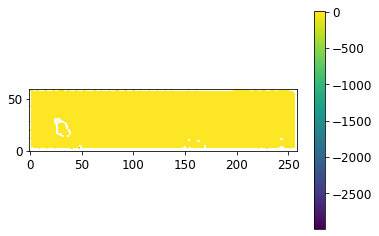

In [81]:
ratio_sio[ratio_sio > 5] = np.nan
ratio_sio.quicklook(use_aplpy=False)
plt.colorbar()

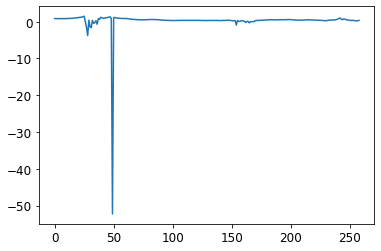

In [82]:
plt.plot(mean_ratio(ratio_sio))

Text(0.5, 1.0, 'SiO/H2CO Ratio')

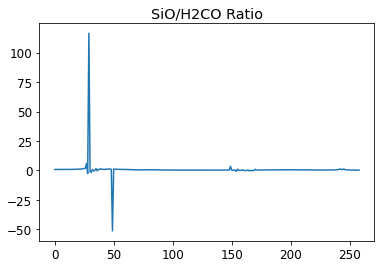

In [83]:
plt.plot(mean_ratio_sio)
plt.title('SiO/H2CO Ratio')

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


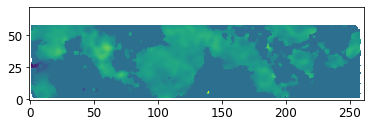

In [84]:
spatial_mask_25 = noise_mask(cube_25, 175*u.km / u.second, 225*u.km/u.second, 5.0)
ratio_h2co = ratio_formal(mom0_alt_23, mom0_alt_25, spatial_mask_23)
mean_ratio_h2co = mean_ratio(ratio_h2co)

Text(0.5, 1.0, 'H2CO/H2CO Ratio')

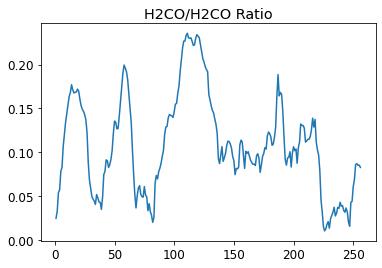

In [85]:
plt.plot(mean_ratio_h2co[:257])
plt.title('H2CO/H2CO Ratio')

In [86]:
spatial_mask_25 = noise_mask(cube_25, 175*u.km / u.second, 225*u.km/u.second, 5.0)
ratio_13co = ratio_formal(mom0_alt_29, mom0_alt_25, spatial_mask_29)
mean_ratio_13co = mean_ratio(ratio_13co)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


NameError: name 'spatial_mask_29' is not defined

Text(0.5, 1.0, '13CO/H2CO Ratio')

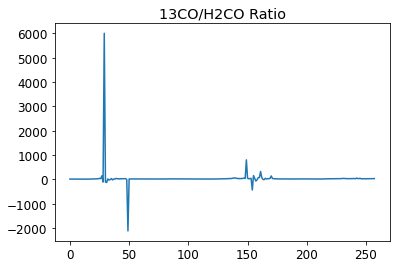

In [87]:
plt.plot(mean_ratio_13co)
plt.title('13CO/H2CO Ratio')

In [88]:
### Chemistry ratios SiO-13CO, SiO-H2CO (both), H2CO-13CO (both)
spatial_mask_23 = noise_mask(cut_cube_23, 0*u.km / u.second, 225*u.km/u.second, 5.0)
spatial_mask_25 = noise_mask(cut_cube_25, 0*u.km / u.second, 225*u.km/u.second, 5.0)
spatial_mask_27 = noise_mask(cut_cube_27, 0*u.km / u.second, 225*u.km/u.second, 5.0)

spatial_mask_17 = noise_mask(cut_cube_17, 0*u.km / u.second, 225*u.km/u.second, 5.0)
spatial_mask_29 = noise_mask(cut_cube_29, 0*u.km / u.second, 225*u.km/u.second, 5.0)
spatial_mask_31 = noise_mask(cut_cube_31, 0*u.km / u.second, 225*u.km/u.second, 5.0)


#ratio_formal(mom0_numer, mom0_denom, mask_numer, mask_denom)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, 

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


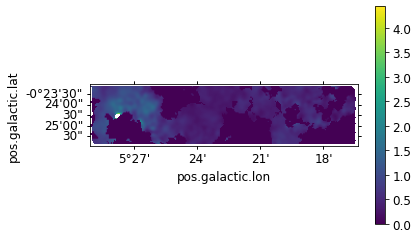

In [89]:
ax = pl.subplot(111, projection=mom0_a_23.wcs.celestial)
spatial_mask_25 = noise_mask(cube_25, 175*u.km / u.second, 225*u.km/u.second, 5.0)
ratio_sio = ratio_formal(mom0_alt_27, mom0_alt_25, spatial_mask_27)
mean_ratio_sio = mean_ratio(ratio_sio)

plt.colorbar()

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice
<__array_function__ internals>:180: RuntimeWarning: Degrees of freedom <= 0 for slice.


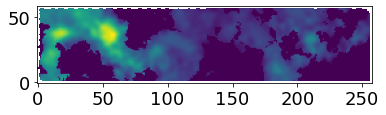

In [151]:
# SiO spw 27 / 13CO spw 29
ratio_27_29 = ratio_formal(mom0_27, mom0_29, spatial_mask_27)
mean_ratio_27_29 = mean_ratio(ratio_27_29)
std_ratio_27_29 = np.nanstd(ratio_27_29, axis=0)


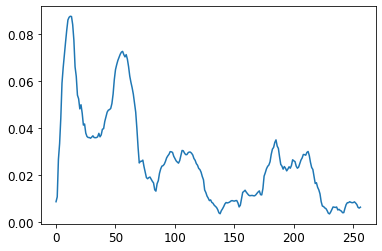

In [91]:
plt.plot(mean_ratio_27_29)

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


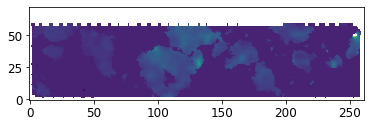

In [92]:
# SiO spw 27 / H2CO spw 23 3(21)-2(20)
ratio_23_27 = ratio_formal(mom0_23, mom0_27, spatial_mask_23)
mean_ratio_23_27 = mean_ratio(ratio_23_27)

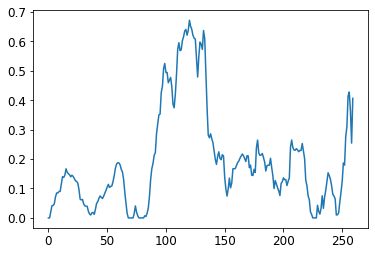

In [93]:
plt.plot(mean_ratio_23_27)

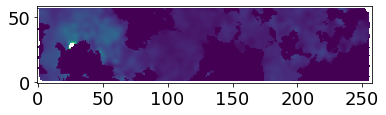

In [137]:
# SiO spw 27 / H2CO spw 25 3(0,3)-2(0,2)
ratio_27_25 = ratio_formal(mom0_27, mom0_25, spatial_mask_27)
mean_ratio_27_25 = mean_ratio(ratio_27_25)
std_ratio_27_25 = np.nanstd(ratio_27_25, axis=0)
# std_tempa_h2co = np.nanstd(T_a, axis=0)

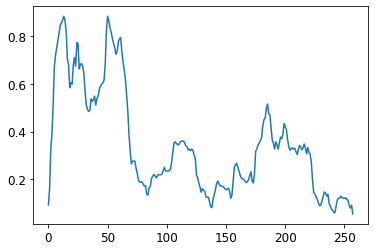

In [95]:
plt.plot(mean_ratio_27_25)

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


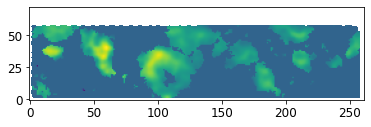

In [96]:
# H2CO spw 23 3(21)-2(20) / 13CO spw 29
ratio_23_29 = ratio_formal(mom0_23, mom0_29, spatial_mask_23)
mean_ratio_23_29 = mean_ratio(ratio_23_29)
#mean_ratio_23_29[30] = np.nan

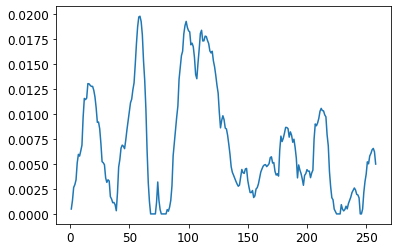

In [97]:
plt.plot(mean_ratio_23_29[:])

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice
<__array_function__ internals>:180: RuntimeWarning: Degrees of freedom <= 0 for slice.


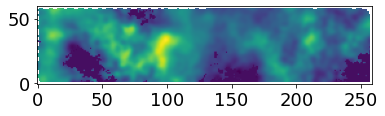

In [142]:
# H2CO spw 25 3(0,3)-2(0,2) / 13CO spw 29
ratio_25_29 = ratio_formal(mom0_25, mom0_29, spatial_mask_25)
mean_ratio_25_29 = mean_ratio(ratio_25_29)
std_ratio_25_29 = np.nanstd(ratio_25_29, axis=0)
#mean_ratio_25_29[258] = np.nan

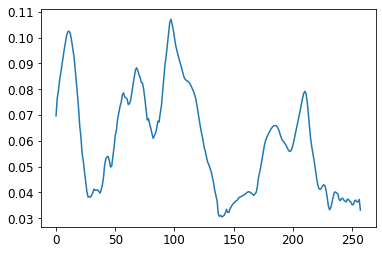

In [99]:
plt.plot(mean_ratio_25_29)

In [100]:
x_258 = np.arange(258) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
x_259 = np.arange(259) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
x_262 = np.arange(262) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)

In [101]:
print(len(mean_ratio_27_29),len(mean_ratio_23_27),len(mean_ratio_27_25),len(mean_ratio_23_29),len(mean_ratio_25_29))

258 262 258 262 259


In [125]:
mean_ratio_27_23 = np.power(mean_ratio_23_27, -1)
#mean_ratio_27_23[mean_ratio_27_23>10] = np.nan
mean_ratio_27_23 = mean_ratio_27_23/10.

/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


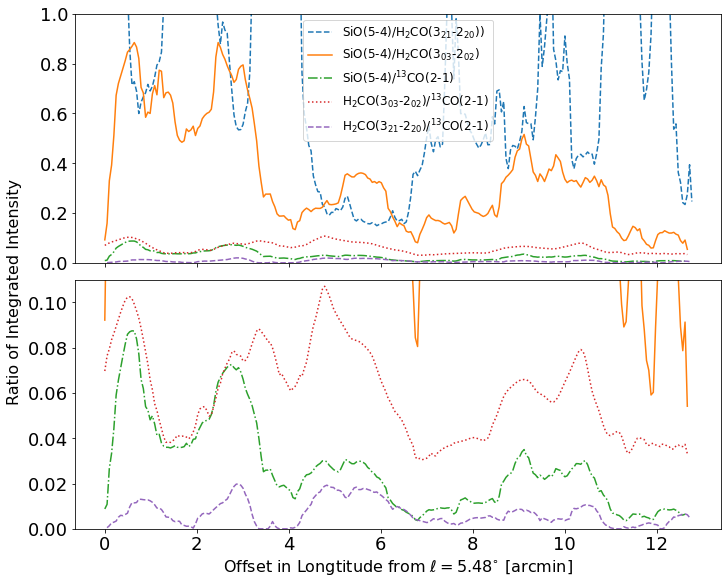

In [156]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True)
plt.rcParams.update({'font.size': 16})

# Hide x labels and tick labels for all but bottom plot.
axs[0].plot(x_262, mean_ratio_27_23, '--', label='SiO(5-4)/H$_2$CO(3$_{21}$-2$_{20}$))', color='tab:blue')#label='H$_2$CO(3$_{21}$-2$_{20}$)/SiO(5-4)')
axs[0].plot(x_258, mean_ratio_27_25, '-', label='SiO(5-4)/H$_2$CO(3$_{03}$-2$_{02}$)', color='tab:orange')
axs[0].plot(x_258, mean_ratio_27_29, '-.', label='SiO(5-4)/$^{13}$CO(2-1)', color='tab:green')
axs[0].plot(x_259, mean_ratio_25_29, ':', label='H$_2$CO(3$_{03}$-2$_{02}$)/$^{13}$CO(2-1)', color='tab:red')
axs[0].plot(x_262, mean_ratio_23_29, '--', label='H$_2$CO(3$_{21}$-2$_{20}$)/$^{13}$CO(2-1)', color='tab:purple')
axs[0].legend(fontsize=12)

axs[1].plot(x_262, mean_ratio_27_23, '--', label='H$_2$CO(3$_{21}$-2$_{20}$)/SiO(5-4)', color='tab:blue')
axs[1].plot(x_258, mean_ratio_27_25, '-', label='SiO(5-4)/H$_2$CO(3$_{03}$-2$_{02}$)', color='tab:orange')
axs[1].plot(x_258, mean_ratio_27_29, '-.', label='SiO(5-4)/$^{13}$CO(2-1)', color='tab:green')
axs[1].plot(x_259, mean_ratio_25_29, ':', label='H$_2$CO(3$_{03}$-2$_{02}$)/$^{13}$CO(2-1)', color='tab:red')
axs[1].plot(x_262, mean_ratio_23_29, '--', label='H$_2$CO(3$_{21}$-2$_{20}$)/$^{13}$CO(2-1)', color='tab:purple')

for ax in axs.flat:
    ax.label_outer()    
axs[0].set_ylim(bottom=0, top=1)
axs[1].set_ylim(bottom=0, top=0.11)
fig.set_figheight(8)
fig.set_figwidth(10)
plt.xlabel("Offset in Longtitude from $\ell=5.48^{\circ}$ [arcmin]", fontsize=16)
fig.supylabel('Ratio of Integrated Intensity', fontsize=16)
plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/chemistry_ratio.pdf', bbox_inches='tight')


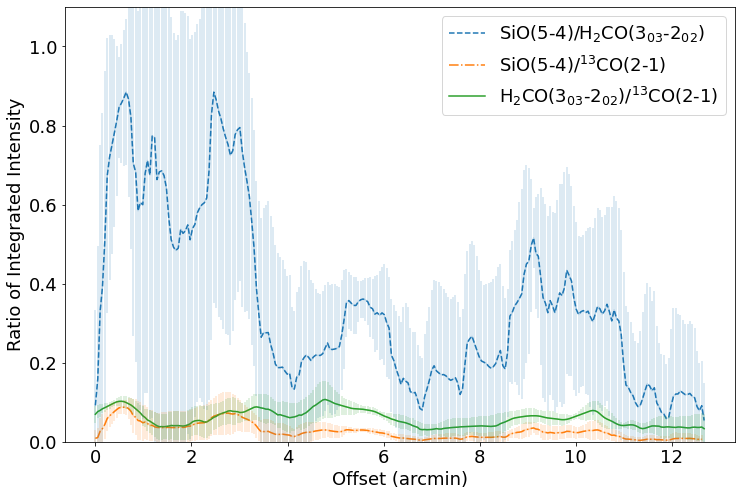

In [155]:
lines = ["--","-.","-",":"]
linecycler = cycle(lines)

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
# H2CO spw 23 3(21)-2(20)
#  H2CO spw 25 3(0,3)-2(0,2)
#plt.plot(x_262, mean_ratio_23_27, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/SiO(5-4)')
plt.plot(x_258, mean_ratio_27_25, next(linecycler), label='SiO(5-4)/H$_2$CO(3$_{03}$-2$_{02}$)')
plt.plot(x_258, mean_ratio_27_29, next(linecycler), label='SiO(5-4)/$^{13}$CO(2-1)')
plt.plot(x_259, mean_ratio_25_29, next(linecycler), label='H$_2$CO(3$_{03}$-2$_{02}$)/$^{13}$CO(2-1)')

# plt.errorbar(x=x,y=mean_tempa_h2co_masked,yerr=std_tempa_h2co, alpha=0.2, color='tab:blue')
plt.errorbar(x=x_258, y=mean_ratio_27_25, yerr=std_ratio_27_25, alpha=0.2, color='tab:blue')
plt.errorbar(x=x_258, y=mean_ratio_27_29, yerr=std_ratio_27_29, alpha=0.2, color='tab:orange')
plt.errorbar(x=x_259, y=mean_ratio_25_29, yerr=std_ratio_25_29, alpha=0.2, color='tab:green')

#plt.plot(x_262, mean_ratio_23_29, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/$^{13}$CO(2-1)')

plt.ylim(top=1.1, bottom=0)
plt.xlabel('Offset (arcmin)')
plt.ylabel('Ratio of Integrated Intensity')#, fontsize=16)

plt.legend()
#plt.title('Chemistry Ratios')
#plt.savefig('plots/chemistry_ratio.pdf', bbox_inches='tight')
#plt.savefig('plots/chemistry_ratio.png')

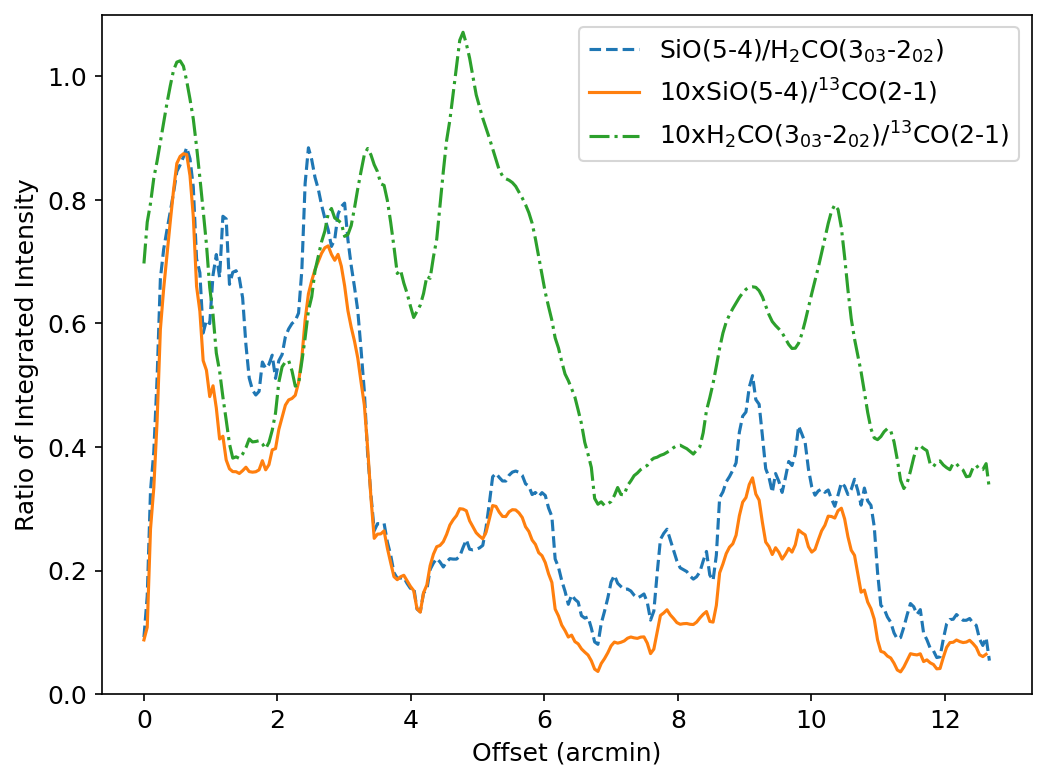

In [172]:
lines = ["--","-.","-",":"]
linecycler = cycle(lines)

#plt.figure(figsize=(12,8))
#plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6),dpi=150)
plt.rcParams.update({'font.size': 12})
# H2CO spw 23 3(21)-2(20)
#  H2CO spw 25 3(0,3)-2(0,2)
#plt.plot(x_262, mean_ratio_23_27, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/SiO(5-4)')
plt.plot(x_258, mean_ratio_27_25, '--', label='SiO(5-4)/H$_2$CO(3$_{03}$-2$_{02}$)')
plt.plot(x_258, mean_ratio_27_29*10, '-', label='10xSiO(5-4)/$^{13}$CO(2-1)')
plt.plot(x_259, mean_ratio_25_29*10, '-.', label='10xH$_2$CO(3$_{03}$-2$_{02}$)/$^{13}$CO(2-1)')

# plt.errorbar(x=x,y=mean_tempa_h2co_masked,yerr=std_tempa_h2co, alpha=0.2, color='tab:blue')
#plt.errorbar(x=x_258, y=mean_ratio_27_25, yerr=std_ratio_27_25, alpha=0.2, color='tab:blue')
#plt.errorbar(x=x_258, y=mean_ratio_27_29*10, yerr=std_ratio_27_29*10, alpha=0.2, color='tab:orange')
#plt.errorbar(x=x_259, y=mean_ratio_25_29*10, yerr=std_ratio_25_29*10, alpha=0.2, color='tab:green')

#plt.plot(x_262, mean_ratio_23_29, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/$^{13}$CO(2-1)')

plt.ylim(top=1.1, bottom=0)
plt.xlabel('Offset (arcmin)')
plt.ylabel('Ratio of Integrated Intensity')#, fontsize=16)

plt.legend()
#plt.title('Chemistry Ratios')
#plt.savefig('plots/chemistry_ratio.pdf', bbox_inches='tight')
plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/chemistry_ratio.pdf', bbox_inches='tight')

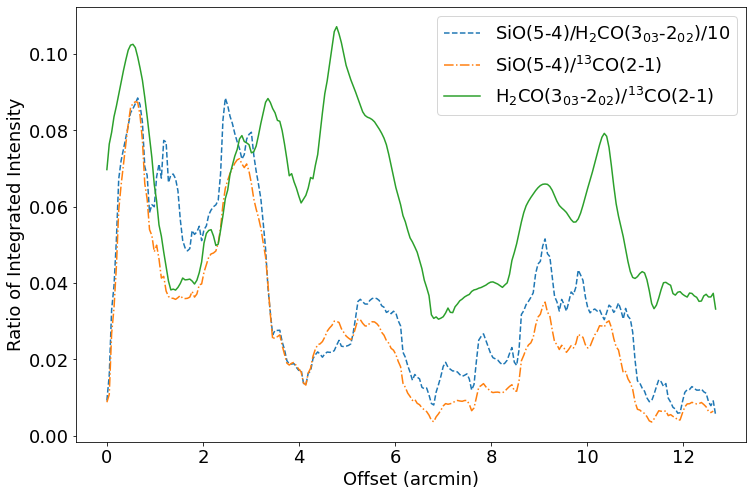

In [160]:
lines = ["--","-.","-",":"]
linecycler = cycle(lines)

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
# H2CO spw 23 3(21)-2(20)
#  H2CO spw 25 3(0,3)-2(0,2)
#plt.plot(x_262, mean_ratio_23_27, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/SiO(5-4)')
plt.plot(x_258, mean_ratio_27_25/10, next(linecycler), label='SiO(5-4)/H$_2$CO(3$_{03}$-2$_{02}$)/10')
plt.plot(x_258, mean_ratio_27_29, next(linecycler), label='SiO(5-4)/$^{13}$CO(2-1)')
plt.plot(x_259, mean_ratio_25_29, next(linecycler), label='H$_2$CO(3$_{03}$-2$_{02}$)/$^{13}$CO(2-1)')

# plt.errorbar(x=x,y=mean_tempa_h2co_masked,yerr=std_tempa_h2co, alpha=0.2, color='tab:blue')
#plt.errorbar(x=x_258, y=mean_ratio_27_25/10, yerr=std_ratio_27_25/10, alpha=0.2, color='tab:blue')
#plt.errorbar(x=x_258, y=mean_ratio_27_29, yerr=std_ratio_27_29, alpha=0.2, color='tab:orange')
#plt.errorbar(x=x_259, y=mean_ratio_25_29, yerr=std_ratio_25_29, alpha=0.2, color='tab:green')

#plt.plot(x_262, mean_ratio_23_29, next(linecycler), label='H$_2$CO(3$_{21}$-2$_{20}$)/$^{13}$CO(2-1)')

#plt.ylim(top=1.1, bottom=0)
plt.xlabel('Offset (arcmin)')
plt.ylabel('Ratio of Integrated Intensity')#, fontsize=16)

plt.legend()
#plt.title('Chemistry Ratios')
#plt.savefig('plots/chemistry_ratio.pdf', bbox_inches='tight')
#plt.savefig('plots/chemistry_ratio.png')

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


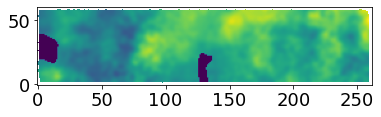

In [104]:
# 13CO / 12CO
ratio_29_17 = ratio_formal(mom0_29, mom0_17, spatial_mask_29)
mean_ratio_29_17 = mean_ratio(ratio_29_17)
#mean_ratio_25_29[258] = np.nan

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


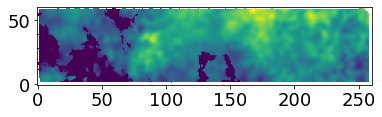

In [105]:
# C18O / 12CO
ratio_31_17 = ratio_formal(mom0_31, mom0_17, spatial_mask_31)
mean_ratio_31_17 = mean_ratio(ratio_31_17)

<__array_function__ internals>:180: RuntimeWarning: Mean of empty slice


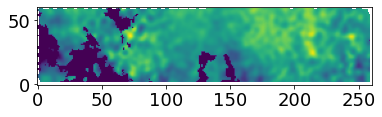

In [106]:
# C18O / 13CO
ratio_31_29 = ratio_formal(mom0_31, mom0_29, spatial_mask_31)
mean_ratio_31_29 = mean_ratio(ratio_31_29)

In [ ]:
x_262 = np.arange(mean_ratio_29_17.size) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
x_261 = np.arange(mean_ratio_31_29.size) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)


In [ ]:
mom0_17 = cube_17.with_mask(cube_17>0.05*u.K).spectral_slab(15*u.km/u.s, 200*u.km/u.s).moment0()
mom0_29 = cube_29.with_mask(cube_29>0.05*u.K).spectral_slab(15*u.km/u.s, 200*u.km/u.s).moment0()
mom0_31 = cube_31.spectral_slab(15*u.km/u.s, 200*u.km/u.s).moment0()

spatialmask17 = noise_mask(cube_17.with_mask(cube_17>0.05*u.K), 15*u.km / u.second, 200*u.km/u.second, 5.0)
spatialmask29 = noise_mask(cube_29.with_mask(cube_29>0.05*u.K), 15*u.km / u.second, 200*u.km/u.second, 5.0)
spatialmask31 = noise_mask(cube_31.with_mask(cube_31>0.05*u.K), 15*u.km / u.second, 200*u.km/u.second, 5.0)


In [ ]:
noise = cube_31.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(15*u.km / u.second, 75*u.km / u.second).mad_std(axis=0)
noise.quicklook()

In [ ]:
peak = cube_31.max(axis=0)
peak.quicklook()

In [ ]:
spatial_mask = peak > 0.15*u.K#5.0 * noise
spatial_mask

In [ ]:
#spatial_mask
mom0_31b_alt = cube31b.moment0()*spatial_mask

In [ ]:
mom0_31b_alt.quicklook()

In [ ]:
ratio = ratio_formal(mom0_29, mom0_17, spatialmask29)
mean_ratioo = mean_ratio(ratio)

In [ ]:
plt.plot(mean_ratioo)

In [ ]:
# A is the high velocity cloud from 75 to 200 km/s
cube17a = cube_17.with_mask(cube_17>0.05*u.K).spectral_slab(75*u.km/u.s, 200*u.km/u.s)
# B is the low velocity cloud from 15 to 75 km/s
cube17b = cube_17.with_mask(cube_17>0.05*u.K).spectral_slab(15*u.km/u.s, 75*u.km/u.s)
spatialmask17a = noise_mask(cube17a, 75*u.km / u.second, 200*u.km/u.second, 5.0)
spatialmask17b = noise_mask(cube17b, 15*u.km / u.second, 75*u.km/u.second, 5.0)
mom0_17a = cube17a.moment0()
mom0_17b = cube17b.moment0()

In [ ]:
mom0_17a.quicklook()

In [ ]:
mom0_17b.quicklook()

In [ ]:
cube29a = cube_29.spectral_slab(75*u.km/u.s, 200*u.km/u.s)
cube29b = cube_29.spectral_slab(15*u.km/u.s, 75*u.km/u.s)
spatialmask29a = noise_mask(cube29a, 75*u.km / u.second, 200*u.km/u.second, 5.0)
spatialmask29b = noise_mask(cube29b, 15*u.km / u.second, 75*u.km/u.second, 5.0)
mom0_29a = cube29a.moment0()
mom0_29b = cube29b.moment0()

In [ ]:
mom0_29a.quicklook()

In [ ]:
mom0_29b.quicklook()

In [ ]:
cube31a = cube_31.spectral_slab(75*u.km/u.s, 200*u.km/u.s)
cube31b = cube_31.spectral_slab(15*u.km/u.s, 75*u.km/u.s)
spatialmask31a = noise_mask(cube31a, 75*u.km / u.second, 200*u.km/u.second, 1)
spatialmask31b = noise_mask(cube31b, 15*u.km / u.second, 75*u.km/u.second,  1)
mom0_31a = cube31a.moment0()*spatialmask31a
mom0_31b = cube31b.moment0()*spatialmask31b

In [ ]:
ratio = ratio_formal(mom0_31b_alt, mom0_29b, spatial_mask)
mean_ratioo = mean_ratio(ratio)


In [ ]:
plt.plot(mean_ratioo)

In [ ]:
# 12CO / 13CO
ratio = ratio_formal(mom0_31b, mom0_29b, spatial_mask)
mean_ratio = mean_ratio(ratio)

ratio = ratio_formal(mom0_31b, mom0_29b, spatial_mask)
mean_ratio = mean_ratio(ratio)

# 13CO / C18O
ratio = ratio_formal(mom0_31b, mom0_29b, spatialmask31b)
mean_ratio = mean_ratio(ratio)

ratio = ratio_formal(mom0_31b, mom0_29b, spatialmask31b)
mean_ratio = mean_ratio(ratio)

# 12CO / C18O 
ratio = ratio_formal(mom0_31b, mom0_29b, spatialmask31b)
mean_ratio = mean_ratio(ratio)

ratio = ratio_formal(mom0_31b, mom0_29b, spatialmask31b)
mean_ratio = mean_ratio(ratio)

In [ ]:
plt.plot(mean_ratioo)

In [ ]:
mean_ratioo[mean_ratioo<0.00001] = np.nan

In [ ]:
plt.plot(mean_ratioo)

In [ ]:
#cube17 = cube_17.with_mask(cube_17>0.05*u.K).spectral_slab(15*u.km/u.s, 200*u.km/u.s)
#spatial_mask_29 = noise_mask(cut_cube_29, 15*u.km / u.second, 200*u.km/u.second, 5.0)
#spatial_mask_31 = noise_mask(cut_cube_31, 15*u.km / u.second, 200*u.km/u.second, 5.0)
#plt.plot(mean_a_h2co, label='0-75')
#plt.plot(mean_b_h2co, label='75-200')

In [ ]:
ww = wcs.WCS(mom0_31b.header)
pixelarea = ww.proj_plane_pixel_area()
x = np.arange(len(mean_ratioo)) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
plt.plot(x, mean_ratioo)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(x_262,mean_ratio_29_17, label='$^{13}$CO(2-1)/$^{12}$CO(2-1)')
#plt.plot(mean_ratio_31_17)
plt.plot(x_261,mean_ratio_31_29, label='C$^{18}$O(2-1)/$^{13}$CO(2-1)')

plt.xlabel('Offset (arcmin)')
plt.legend()
plt.title('Isotopologue Ratios')
plt.savefig('plots/isotopologue_ratio.pdf')
plt.savefig('plots/isotopologue_ratio.png')

In [ ]:
plt.rcParams.update({'font.size': 12})

In [ ]:
#medspec_25.quicklook()
#percentile.quicklook()
#percentile_10.quicklook() # subtract off
#percentile_1.quicklook()

In [ ]:
#medspec_25 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').median(axis=(1,2))
#percentile = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(25,axis=(1,2))
#percentile_10 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(10,axis=(1,2))
#percentile_1 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(1,axis=(1,2))


In [ ]:
#per10_subtracted = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_10[:,None,None]

In [ ]:
#per10_subtracted.mad_std() # median absolute deviation 
# robust against outliers 

In [ ]:
#per10_subtracted.std() # higher because of the outliers

In [ ]:
#medspec_25 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').median(axis=(1,2))
#percentile = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(25,axis=(1,2))
#percentile_1 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(1,axis=(1,2))
percentile_10 = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(10,axis=(1,2))
per10_subtracted = cube_25.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_10[:,None,None]

In [ ]:
mask_mad = per10_subtracted.reproject(cube_21.with_spectral_unit(u.km/u.s, velocity_convention='radio').header) > 5*per10_subtracted.mad_std()

In [ ]:
mask_mad 
# binary dilation and binary erosion -> lookup

In [ ]:
cube_21_masked = cube_21.with_spectral_unit(u.km/u.s, velocity_convention='radio').with_mask(mask_mad)

In [ ]:
cube_21_masked.mean(axis=1).quicklook()

In [ ]:
cube_21_masked.moment0().quicklook()

In [ ]:
cube21b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.CH3OH.spw21.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
cube25b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw25.im',format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)


In [ ]:
percentile_10_25b = cube25b.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(10,axis=(1,2))
per10_subtracted_25b = cube25b.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_10_25b[:,None,None]

In [ ]:
mask_mad2 = per10_subtracted_25b.reproject(cube21b.with_spectral_unit(u.km/u.s, velocity_convention='radio').header) > 5*per10_subtracted_25b.mad_std()

In [ ]:
cube_21b_masked = cube21b.with_spectral_unit(u.km/u.s, velocity_convention='radio').with_mask(mask_mad2)

In [ ]:
cube_21b_masked.mean(axis=1).quicklook()

In [ ]:
cube_21b_masked

In [ ]:
cube_21b_masked.moment0().quicklook()

In [ ]:
#cube_21_masked.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5a.CH3OH.spw21.fits')
#cube_21b_masked.write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5b.CH3OH.spw21.fits')